# Seam Carving:
* Import an Image 
* Create an Energy Map for the image
* Compute the Cumulative Energy Map for image
* Identify the smallest seam on the img, energy map, culmitive energy map
* Deleting 1/4 of the image horizontal size
* Deleting 1/4 of the image vertical size


In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


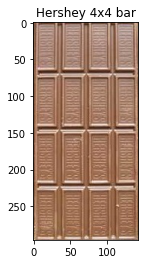

In [0]:
pic = imread("DSCN9844.jpg").astype(int)  

assert pic is not None

imshow(pic);
title("Hershey 4x4 bar");

In [0]:
def generate_energy_map(img):
    
    grad_x = abs(gradient(img, axis = 1) / 255)
    grad_y = abs(gradient(img, axis = 0) / 255)
    
    energy_map = sum((grad_x + grad_y)**2, axis = -1)
    
    return sqrt(energy_map)

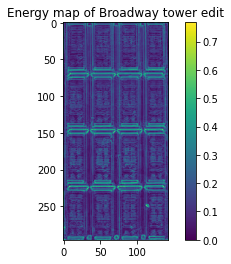

In [0]:
image_energy = generate_energy_map(pic) 

imshow(image_energy);
colorbar();
title("Energy map of Broadway tower edit");

In [0]:
def minimum_seam(img):
    r, c, _= img.shape
    energy_map = generate_energy_map(img)

    M = energy_map.copy()
  
    backtrack = np.zeros_like(M, dtype=int)
    
    for i in range(1, r):
        row1 = np.insert(np.roll(M[i - 1], 1)[1:], 0, Infinity)
        row2 = M[i - 1]
        row3 = np.insert(np.roll(M[i - 1], -1)[:-1], c-1, Infinity)
     
        tmp = array([])
        tmp = append(tmp, row1, axis=0) 
        tmp = append(tmp, row2, axis=0) 
        tmp = append(tmp, row3, axis=0) 
        tmp = reshape(tmp, (3,c))
        
        backtrack[i] = np.argmin(tmp, axis = 0)
        M[i,:] += tmp.min(axis = 0)
        
    return M, backtrack

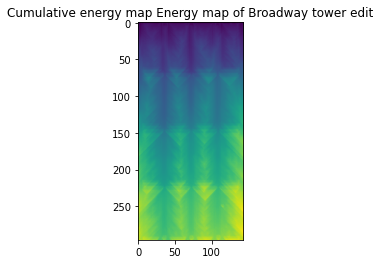

In [0]:
cumulative_energy_map, backtrack = minimum_seam(pic)
imshow(cumulative_energy_map);
title("Cumulative energy map Energy map of Broadway tower edit");

In [0]:
def draw_smallest_seam(img):
    r, c, _ = img.shape

    M, backtrack = minimum_seam(img)

    mask = ones((r, c), dtype=bool)

    j = argmin(M[-1])
    
    for i in reversed(range(r)):
        
        mask[i, j] = False
        if backtrack[i, j] == 2:
            j += 1
        if backtrack[i, j] == 0:
            j -= 1
    
    img_copy = img.copy() 
    img_copy[mask == False] = [255, 0, 0]
    
    energy_map = (generate_energy_map(img) * 255).astype(int) 
    energy_copy = energy_map.copy()
    energy_copy[mask == False] = 255
    
    cumulative_energy_map_copy = M.copy()
    cumulative_energy_map_copy[mask == False] = 0
    
    return mask, img_copy, energy_copy, cumulative_energy_map_copy

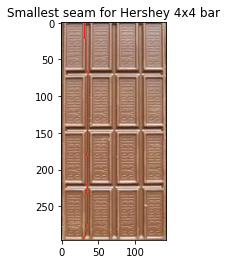

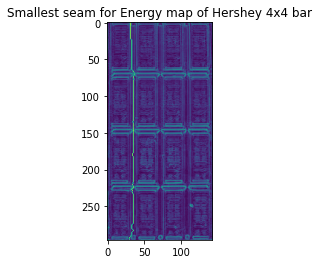

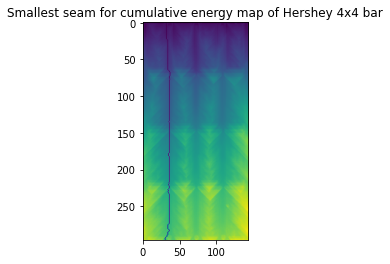

In [0]:
tmp, img_copy, energy_copy, cumulative_energy_map_copy = draw_smallest_seam(pic)
imshow(img_copy);
title("Smallest seam for Hershey 4x4 bar");
show();
imshow(energy_copy);
title("Smallest seam for Energy map of Hershey 4x4 bar");
show();
imshow(cumulative_energy_map_copy);
title("Smallest seam for cumulative energy map of Hershey 4x4 bar");

In [0]:
def delete_seam(img):
    r, c, _ = img.shape
    mask, _, _, _ = draw_smallest_seam(img)
    
    img = img[mask].reshape((r, c - 1, 3))
    
    return img

PRINT_EVERY = 20

def crop_rows(img, scale_c):   
    r, c, _ = img.shape
    new_c = int(scale_c * c)

    for i in range(c - new_c):
        img = delete_seam(img)
        if not i % PRINT_EVERY:
            imshow(img);
            show();
            title(f"Hershey 4x4 bar {i} pixels less");

    return img

def crop_columns(img, scale_c):   
    img = rot90(img, 1, (0, 1))
    r, c, _ = img.shape
    new_c = int(scale_c * c)

    for i in range(c - new_c):
        img = delete_seam(img)
        if not i % PRINT_EVERY:
            imshow(rot90(img, 3, (0, 1)));
            show();
            title(f"Hershey 4x4 bar {i} pixels less");

    return rot90(img, 3, (0, 1))

## Deleting Rows of the Image

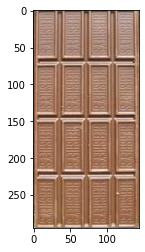

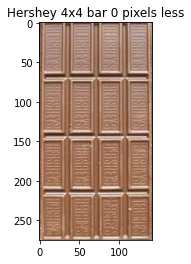

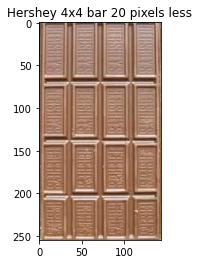

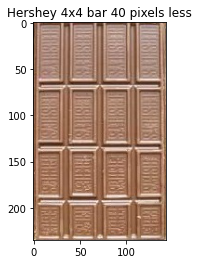

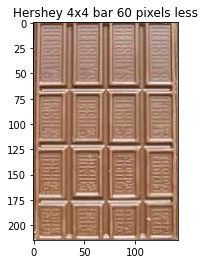

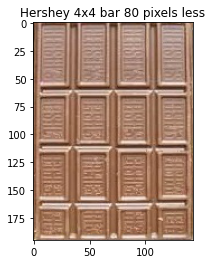

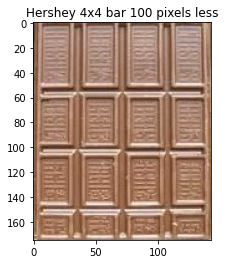

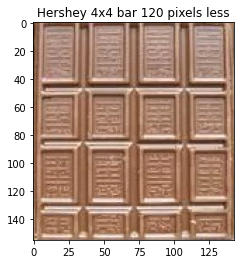

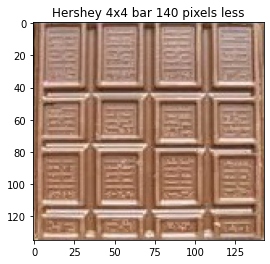

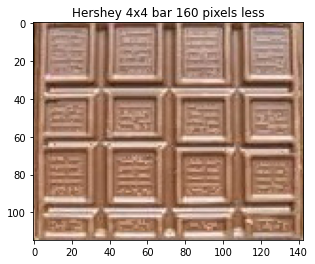

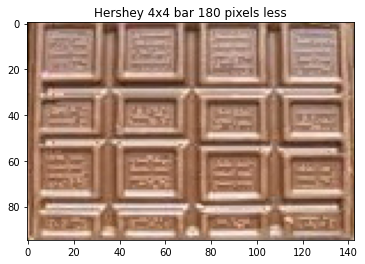

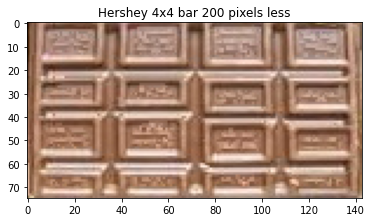

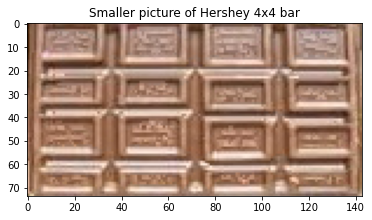

In [0]:
small_pic = crop_columns(pic, 0.25)
imshow(small_pic);
title("Smaller picture of Hershey 4x4 bar");

## Deleting Columns of the Image 

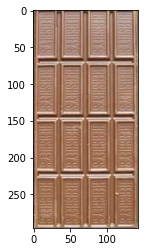

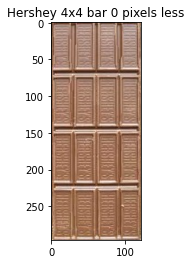

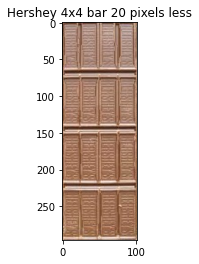

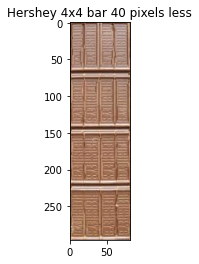

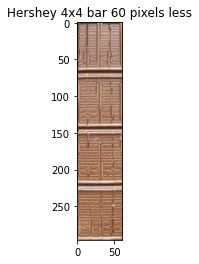

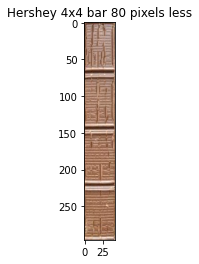

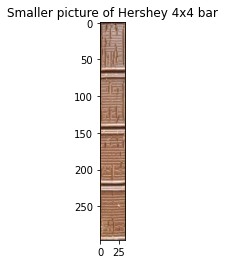

In [0]:
small_pic = crop_rows(pic, 0.25)
imshow(small_pic);
title("Smaller picture of Hershey 4x4 bar");